In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('alimentos.csv', encoding = 'latin-1', sep = ';')
df2 = pd.read_csv('pacientes.csv', sep = ';')

In [5]:
df1.head()

,alimento,aporte_calorico_kcal,tipo_de_alimento,vitamina
0,banana,81,fruta,A
1,kiwi,36,fruta,B
2,higo,62,fruta,B
3,repollo,22,verdura,A
4,col,12,verdura,A


In [6]:
df2.head()

,codigo_paciente,peso_inicial_kg,peso_final_kg,altura_m,genero,tiempo_tratamiento_dias
0,398911,78,72,"1,8",F,583
1,398912,68,68,"1,75",F,159
2,398913,92,70,"1,85",F,70
3,398914,66,64,"1,65",M,41
4,398915,51,50,"1,55",F,30


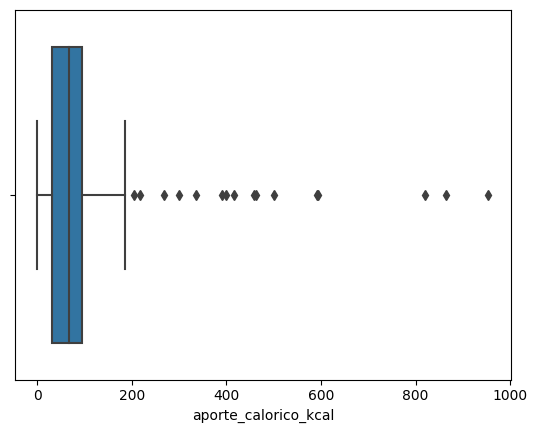

In [31]:
#Item 6
sns.boxplot(x = 'aporte_calorico_kcal', data = df1)
plt.show()

In [32]:
#Cálculo de lim_sup para detectar outliers
Q1 = df1.aporte_calorico_kcal.quantile(0.25)
Q3 = df1.aporte_calorico_kcal.quantile(0.75)
RI = Q3 - Q1
lim_sup = Q3 + 1.5*RI
lim_sup

186.5

In [33]:
#Valores que pueden ser outliers
df1[df1.aporte_calorico_kcal > lim_sup].aporte_calorico_kcal.count()

16

In [34]:
df_sinoutliers = df1[df1.aporte_calorico_kcal <= lim_sup]

In [35]:
len(df_sinoutliers)

83

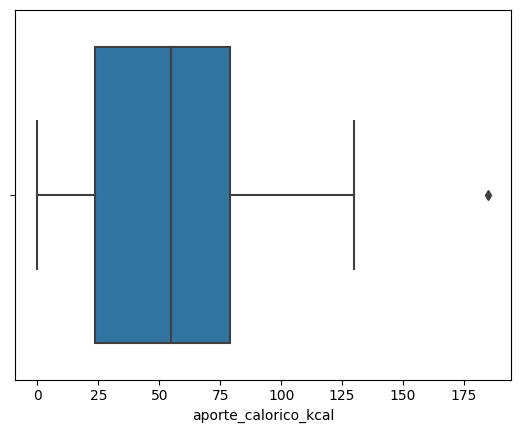

In [36]:
sns.boxplot(x = 'aporte_calorico_kcal', data = df_sinoutliers)
plt.show()

In [46]:
#Calcular media y mediana de la variable "aporte_calorico_kcal" para
#cada tipo de alimento

df1.groupby('tipo_de_alimento').aporte_calorico_kcal.describe()

,count,mean,std,min,25%,50%,75%,max
tipo_de_alimento,,,,,,,,
animal,2.0,49.500000,4.949747,46.0,47.75,49.5,51.25,53.0
elaborada,19.0,315.421053,308.898098,33.0,69.50,217.0,481.50,954.0
fruta,29.0,63.586207,59.138770,5.0,36.00,55.0,80.00,336.0
fruto seco,15.0,186.133333,176.874801,0.0,75.00,113.0,251.50,593.0
verdura,34.0,47.000000,34.535884,2.0,17.50,37.0,82.50,104.0


In [37]:
Q1 = df_sinoutliers.aporte_calorico_kcal.quantile(0.25)
Q3 = df_sinoutliers.aporte_calorico_kcal.quantile(0.75)
RI = Q3 - Q1
lim_sup = Q3 + 1.5*RI
lim_sup

162.25

In [ ]:
#Boxplot para representar distribución de "aporte_calorico_kcal" para
#cada tipo de alimento

<Axes: xlabel='aporte_calorico_kcal', ylabel='tipo_de_alimento'>

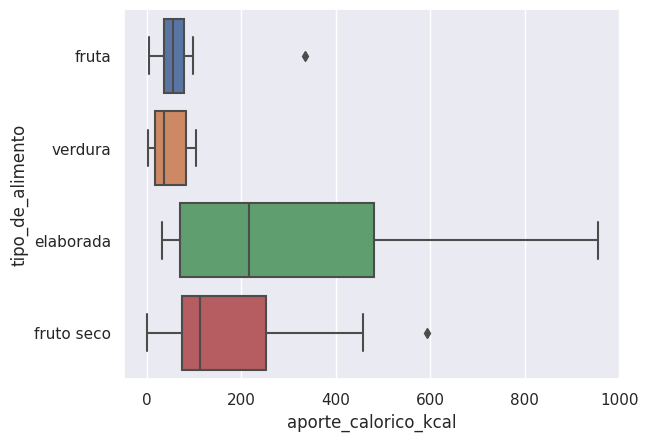

In [45]:
sns.boxplot(x = 'aporte_calorico_kcal', y = 'tipo_de_alimento',
            data = df1[df1.tipo_de_alimento != 'animal'])

<Axes: title={'center': 'aporte_calorico_kcal'}, xlabel='tipo_de_alimento'>

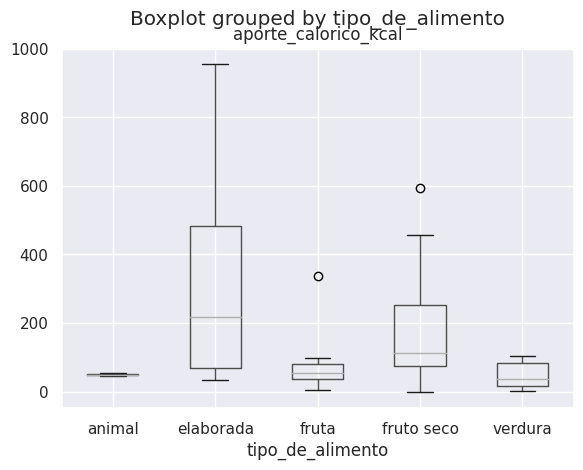

In [44]:
sns.set()
df1.boxplot(column = 'aporte_calorico_kcal', by = 'tipo_de_alimento')

In [47]:
df2.head()

,codigo_paciente,peso_inicial_kg,peso_final_kg,altura_m,genero,tiempo_tratamiento_dias
0,398911,78,72,"1,8",F,583
1,398912,68,68,"1,75",F,159
2,398913,92,70,"1,85",F,70
3,398914,66,64,"1,65",M,41
4,398915,51,50,"1,55",F,30


In [48]:
df2['diferencia_peso'] = df2['peso_final_kg'] - df2['peso_inicial_kg']

In [49]:
df2.head()

,codigo_paciente,peso_inicial_kg,peso_final_kg,altura_m,genero,tiempo_tratamiento_dias,diferencia_peso
0,398911,78,72,"1,8",F,583,-6
1,398912,68,68,"1,75",F,159,0
2,398913,92,70,"1,85",F,70,-22
3,398914,66,64,"1,65",M,41,-2
4,398915,51,50,"1,55",F,30,-1


<Axes: xlabel='diferencia_peso', ylabel='genero'>

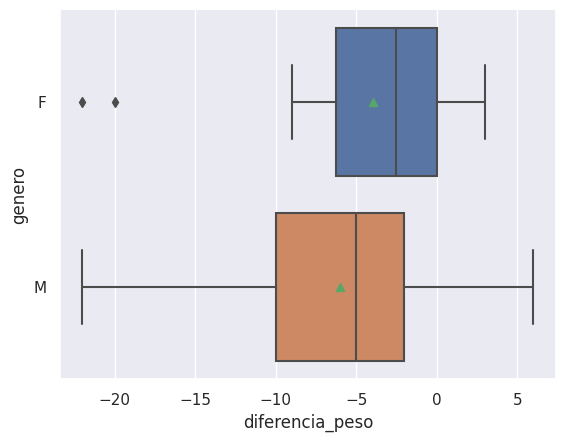

In [51]:
sns.boxplot(x = 'diferencia_peso', y = 'genero', data = df2, showmeans = True)

In [52]:
df2.genero.value_counts()

F    28
M    22
Name: genero, dtype: int64

In [11]:
import numpy as np
import pandas as pd

In [23]:
data = pd.read_csv("cursada_202302 - exposición.csv")
data["Peso"] = data["Peso"].apply(lambda x: float(x.replace(",", ".")))

In [24]:
data.head()

,Número expo,Legajo,Alumno,Peso,01/09/2023,08/09/2023,11/09/2023,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,No expusieron
0,1,B-6512/9,"Baranzano, Gabriel Raúl",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x
1,2,B-6504/8,"Bartolotta, Facundo",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,B-6451/3,"Bossetti, Adriano Juan Esteban",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x
3,4,B-6446/7,"Britos, Julián Francisco",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,B-6419/1,"Brizuela Cipolletti, Sofía",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x


In [28]:

np.random.seed(1)
np.random.choice(data["Número expo"], 33, False, data["Peso"]/data["Peso"].sum())

array([14, 25,  1, 11,  5,  4,  7, 12, 18, 23, 30, 19, 27, 33, 24, 31,  3,
        2,  6, 15, 21, 26, 16, 29,  8, 28, 34, 13,  9, 17, 32, 20, 10])